In [1]:
import scanpy as sc
from scanpy.tools._ingest import Ingest

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
pbmc = sc.datasets.pbmc68k_reduced()

In [4]:
n_split = 400

In [5]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [6]:
adata_ref = sc.AnnData(pbmc.X[:n_split, :], obs=pbmc.obs.iloc[:n_split])
adata_new = sc.AnnData(pbmc.X[n_split:, :], obs=pbmc.obs.iloc[n_split:])

You have some data processed already.

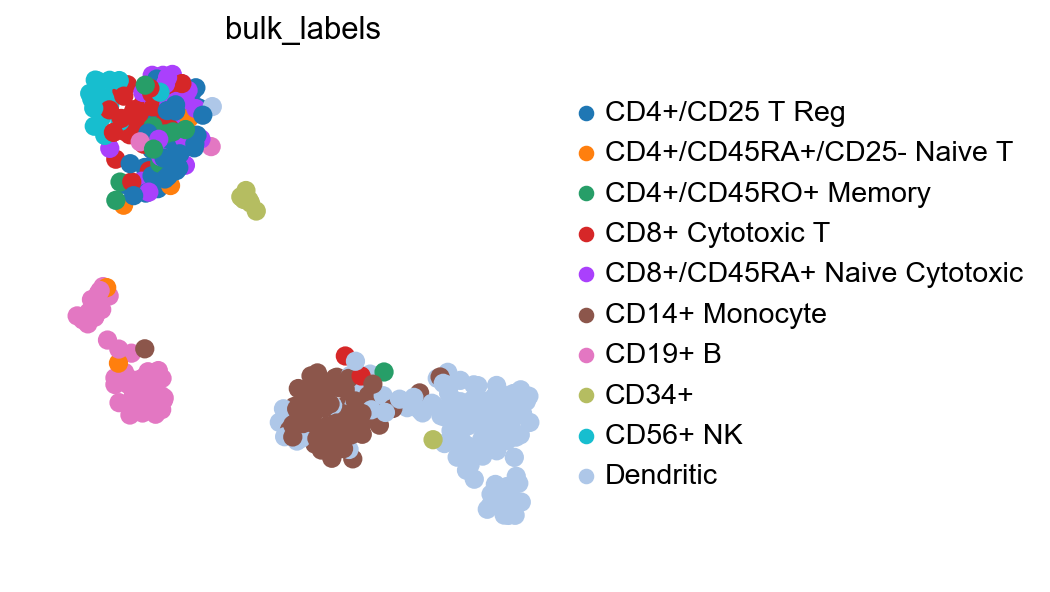

In [7]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='bulk_labels')

You don't know anything about the new data.

In [ ]:
del adata_new.obs['bulk_labels']

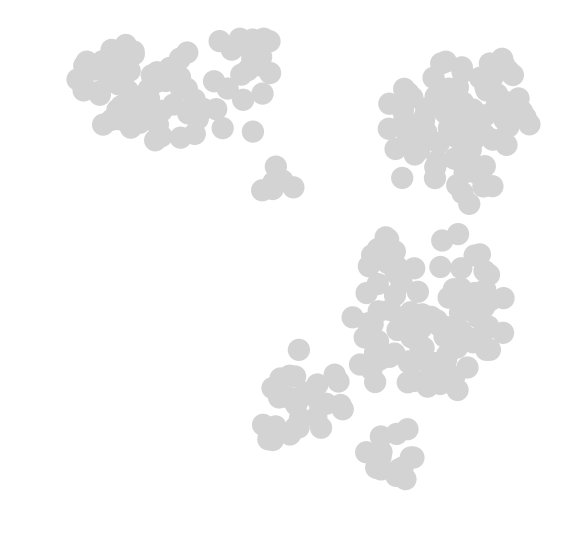

In [8]:
sc.pp.pca(adata_new)
sc.pp.neighbors(adata_new)
sc.tl.umap(adata_new)
sc.pl.umap(adata_new)

Create an object that manages the integration of a new dataset into the reference dataset - here, the mapping of new data into a reference dataset. We could call the class `Integrate`, but as it's a very simple, approximate integration, we'll just call it in `Ingest`.

In [9]:
ing = Ingest(adata_ref)  # Ingest should store both X_pca and PCs of adata_ref

In [13]:
ing.pca(adata_new)  # ingest transforms adata_new with stored transformation
                    # it should store the new X_pca along with the existing X_pca
                    # as an attribute Ingest.rep_new

Now, first compute neighbors and then embed the new data into the existing UMAP.

```
ing = Ingest(adata_ref)      # (writes Ingest._rep_ref and Ingest._transform)
Ingest.transform(adata_new)  # transform new data into existing basis, write into Ingest.obsm[rep] attribute
ingest.neighbors()           # write this as Ingest.neighbors, Ingest.distances
ingest.map_embedding('umap') # write this as Ingest.obsm['X_umap']
ingest.map_labels('bulk_labels')            # write a new column into Ingest.obs['labels']
adata_new_annotated = ingest.to_adata()     # export to AnnData
```

Now, you can
```
sc.pl.umap(adata_new_annotated, color='bulk_labels')
```
or, if you want
```
adata_concat = adata_ref.concatentate(adata_new)
sc.pl.umap(adata_concat, color='bulk_labels')
```

Simplify (non-destructive transformation of adata_ref, adata_new:
    
    adata_new_annotated = sc.tl.ingest(adata_ref, adata_new, obs='bulk_labels', obsm='umap')

In [ ]:
ing.neighbors(adata_new)  # write this as Ingest.neighbors, Ingest.distances

In [17]:
ing.umap(adata_new)       # 

In [22]:
ing.knn_classify(adata_new, 'bulk_labels')

In [23]:
adata_new

AnnData object with n_obs × n_vars = 300 × 765 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain', 'bulk_labels'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

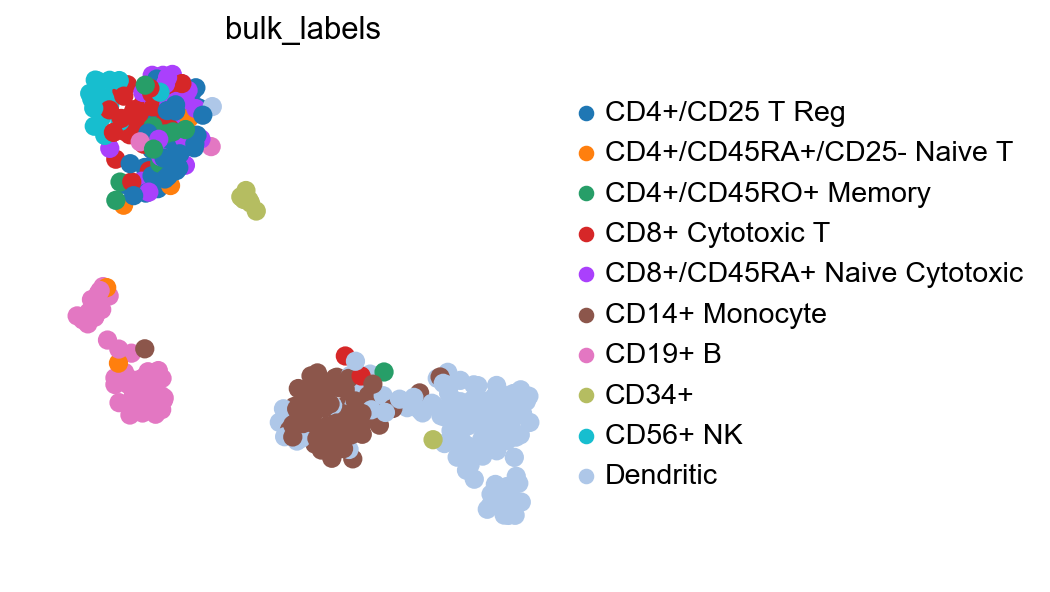

In [25]:
sc.pl.umap(adata_ref, color='bulk_labels')

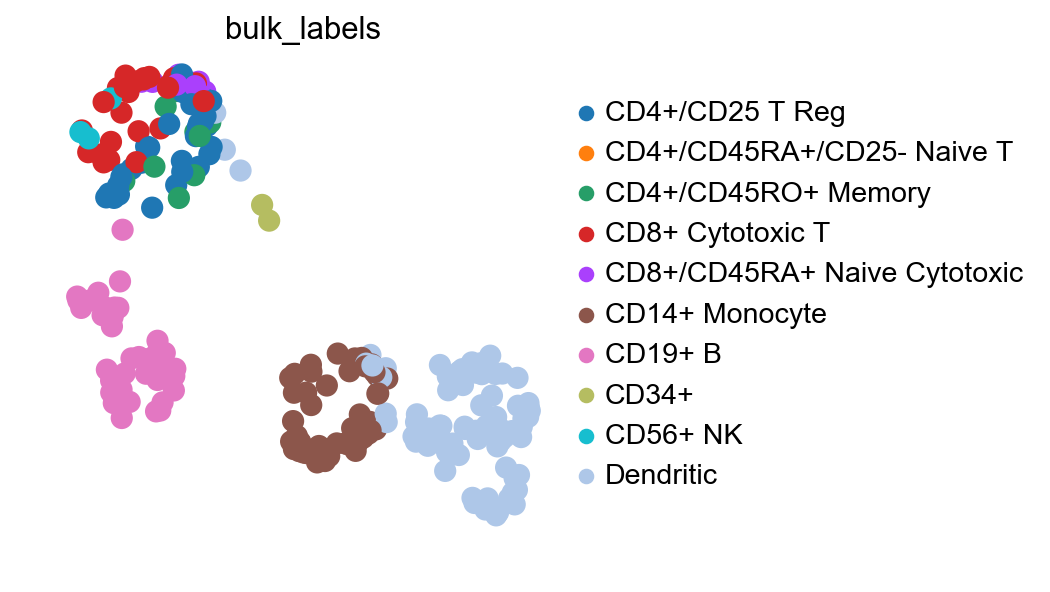

In [24]:
sc.pl.umap(adata_new, color='bulk_labels')